In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib.pyplot as plt

lund = tc.processed_dataset(tc.get_folder_path('lund'))
wolgast = tc.processed_dataset(tc.get_folder_path('wolgast'))
finsterwalde = tc.processed_dataset(tc.get_folder_path('finsterwalde'))

In [2]:
def determine_cell_number(labels):
    import pyclesperanto_prototype as cle
    number_of_spots = cle.maximum_of_all_pixels(cle.push(labels))
    return number_of_spots
test = determine_cell_number(lund.get_labels(0))
test

2970.0

In [3]:
lund_cell_numbers = [determine_cell_number(lund.get_labels(i)) for i in range(25)]
wolgast_cell_numbers = [determine_cell_number(wolgast.get_labels(i)) for i in range(32)]
finsterwalde_cell_numbers = [determine_cell_number(finsterwalde.get_labels(i)) for i in range(32)]

In [4]:
import beetlesafari as bs
timeslice_duration = bs.hours_to_seconds(3)/32
timeslice_duration_mi = bs.seconds_to_minutes(timeslice_duration)

timeslice_lund = bs.seconds_to_minutes(bs.hours_to_seconds(4/25))

x_axis_finster_wolgast = np.array(range(32))*timeslice_duration_mi
x_axis_finster_wolgast
x_axis_lund = np.array(range(25))*timeslice_lund
x_axis_lund

array([  0. ,   9.6,  19.2,  28.8,  38.4,  48. ,  57.6,  67.2,  76.8,
        86.4,  96. , 105.6, 115.2, 124.8, 134.4, 144. , 153.6, 163.2,
       172.8, 182.4, 192. , 201.6, 211.2, 220.8, 230.4])

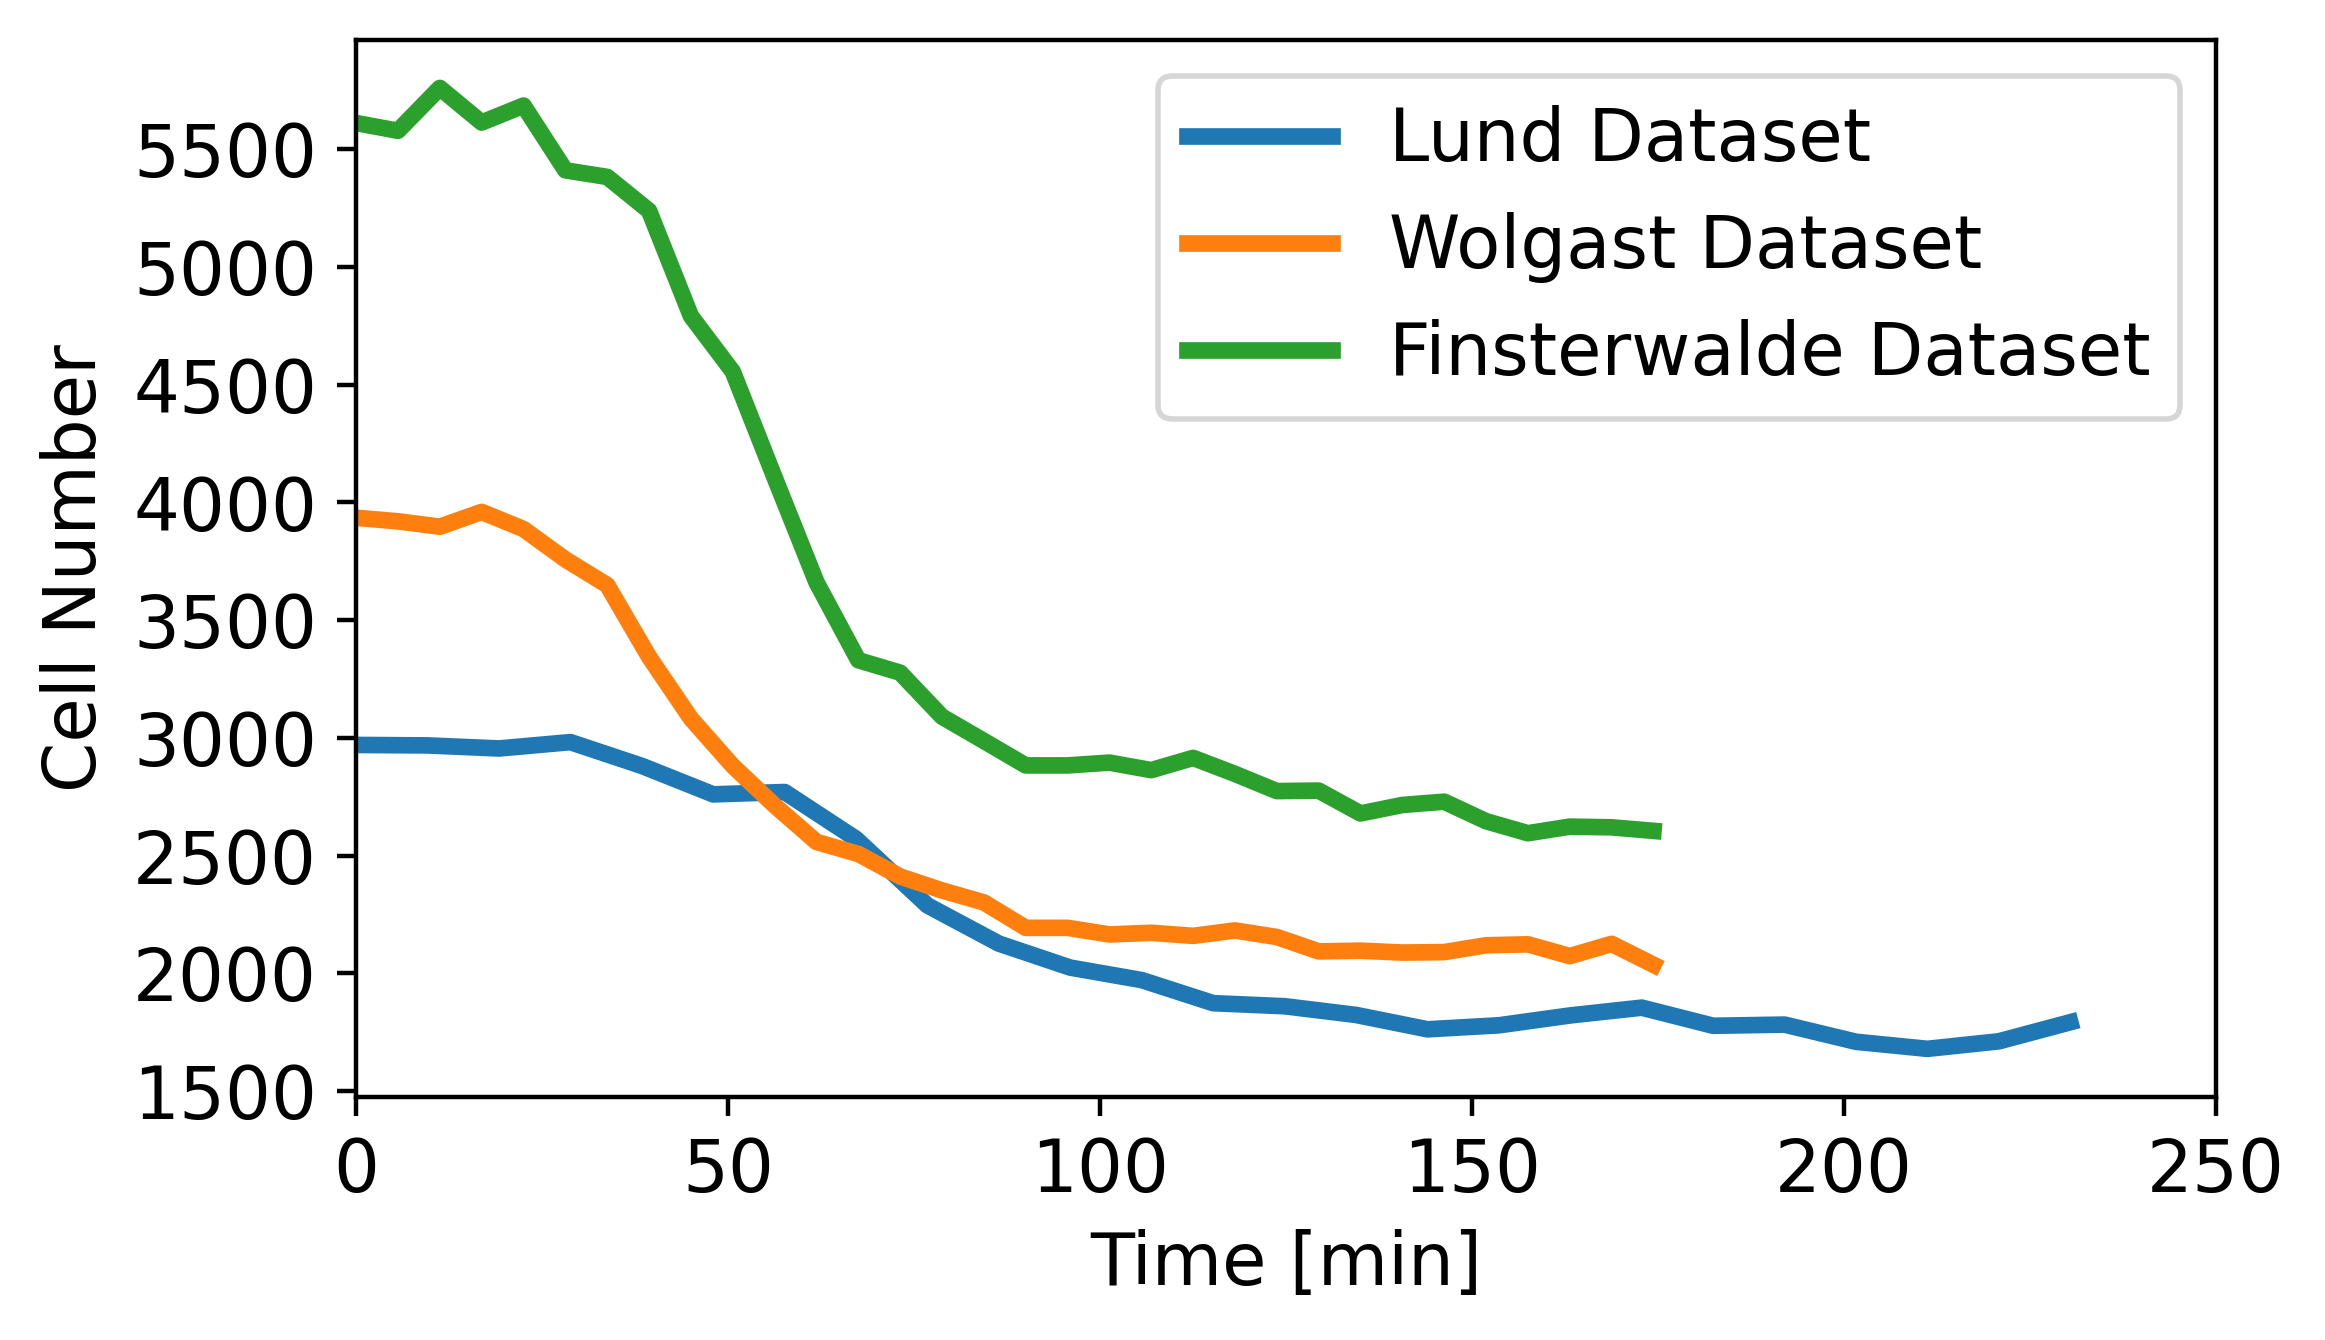

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

lw = 3
big_fs = 13
small_fs = 13

fig, ax = plt.subplots(1,1,figsize=(6,3.5))

ax.plot(x_axis_lund,lund_cell_numbers,linewidth=lw, label='Lund Dataset')
ax.plot(x_axis_finster_wolgast,wolgast_cell_numbers,linewidth=lw, label='Wolgast Dataset')
ax.plot(x_axis_finster_wolgast,finsterwalde_cell_numbers,linewidth=lw, label='Finsterwalde Dataset')

ax.set_ylabel('Cell Number', fontsize =big_fs)
ax.set_xlabel('Time [min]', fontsize =big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
plt.legend(fontsize =big_fs)
plt.xlim([0,250])
plt.show()

In [6]:
tc.feature_processing.variance_filter(lund.get_combined_thesis_props(),print_variances=True)

No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//
area has coeff of var: 0.9050348572808327
equivalent_diameter has coeff of var: 0.28307620552687157
minor_axis_length has coeff of var: 0.3060050255065003
major_axis_length has coeff of var: 0.24238659270709723
bbox_area has coeff of var: 0.776343236257832
extent has coeff of var: 0.24795319977055727
feret_diameter_max has coeff of var: 0.2355758509680605
max_intensity has coeff of var: 0.24715000735192658
mean_intensity has coeff of var: 0.3179316265033438
min_intensity has coeff of var: 0.3675230030585266
solidity has coeff of var: 0.09769721401893176
centroid-0 has coeff of var: 0.49575887996994994
centroid-1 has coeff of var: 0.3998158382185015
centroid-2 has coeff of var: 0.5753585357495508
image_stdev has coeff of var: 0.4727036586119159
avg distance of 4 closest points has coeff of var: 0.42010764791458255
stddev distance of 4 closest points has coeff of var: 0.425

,area,equivalent_diameter,minor_axis_length,major_axis_length,bbox_area,extent,feret_diameter_max,max_intensity,mean_intensity,min_intensity,...,centroid-2,image_stdev,avg distance of 4 closest points,stddev distance of 4 closest points,avg distance of 5 closest points,stddev distance of 5 closest points,avg distance of 6 closest points,stddev distance of 6 closest points,touching neighbor count,aspect_ratio
0,4348,20.250246,23.650850,34.609157,11025,0.394376,33.837849,556,395.721252,280,...,33.532199,55.809849,14.430141,1.830269,15.972376,1.820836,17.020737,1.770446,6.0,1.463337
1,9374,26.160263,32.118075,37.636106,14300,0.655524,36.027767,538,374.063568,280,...,34.807446,41.625885,19.489208,1.886238,20.571356,1.927392,21.454685,1.946990,5.0,1.171805
2,4760,20.870656,23.941198,32.931864,9568,0.497492,31.032241,574,426.445160,290,...,33.732563,49.124729,15.597941,2.077615,16.393642,2.063778,17.268673,2.011951,9.0,1.375531
3,5409,21.779076,26.326109,30.028910,8800,0.614659,29.883106,639,450.261780,317,...,33.331115,58.492424,16.476414,2.084768,17.096420,2.104909,17.704868,2.061071,8.0,1.140651
4,10575,27.232902,33.831529,41.682641,17226,0.613898,41.737274,527,384.147430,297,...,36.659007,37.146133,20.974693,2.150375,21.759745,2.132292,22.428100,2.057659,6.0,1.232065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54483,25023,36.289439,44.703249,52.843471,73950,0.338377,54.460995,484,263.622040,184,...,498.110658,40.599789,37.255127,3.072624,40.447025,3.352430,43.270947,3.728810,4.0,1.182095
54484,19749,33.536327,38.634906,51.079012,28512,0.692656,50.179677,385,249.633545,198,...,499.020912,25.227795,34.669890,2.535487,39.791008,3.088556,43.284363,3.577744,4.0,1.322095
54485,13817,29.771797,35.154517,49.073960,29120,0.474485,50.606324,540,263.658691,195,...,497.392705,43.354935,33.007460,2.281196,35.518460,2.751736,38.467102,3.231900,4.0,1.395950
54486,19488,33.387934,39.952577,49.878939,34500,0.564870,50.517324,499,269.974701,196,...,500.118740,42.377182,33.741590,3.011970,39.466747,3.368092,43.749817,3.820367,4.0,1.248454


In [8]:
def coeff_variation(df_regprops):
    from sklearn.feature_selection import VarianceThreshold
    import pandas as pd
    import numpy as np
    keys = df_regprops.keys().tolist()
        
    stdevs = np.std(df_regprops, axis = 0).to_numpy()
    means = np.mean(df_regprops, axis = 0).to_numpy()

    coefficients_of_variation = stdevs/means

    return coefficients_of_variation

coefficients_var_lund = coeff_variation(lund.get_combined_thesis_props_no_correlation())
coefficients_var_wolg = coeff_variation(wolgast.get_combined_thesis_props_no_correlation())
coefficients_var_fnst = coeff_variation(finsterwalde.get_combined_thesis_props_no_correlation())

No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Wolgast Gastrulation Labels//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Finsterwalde Gastrulation Labels (new timeframe)//


In [9]:
keys = lund.get_combined_thesis_props_no_correlation().keys()
keys

No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//


Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

<ipython-input-31-9dc99258d556>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1],rotation=90,fontsize = big_fs)


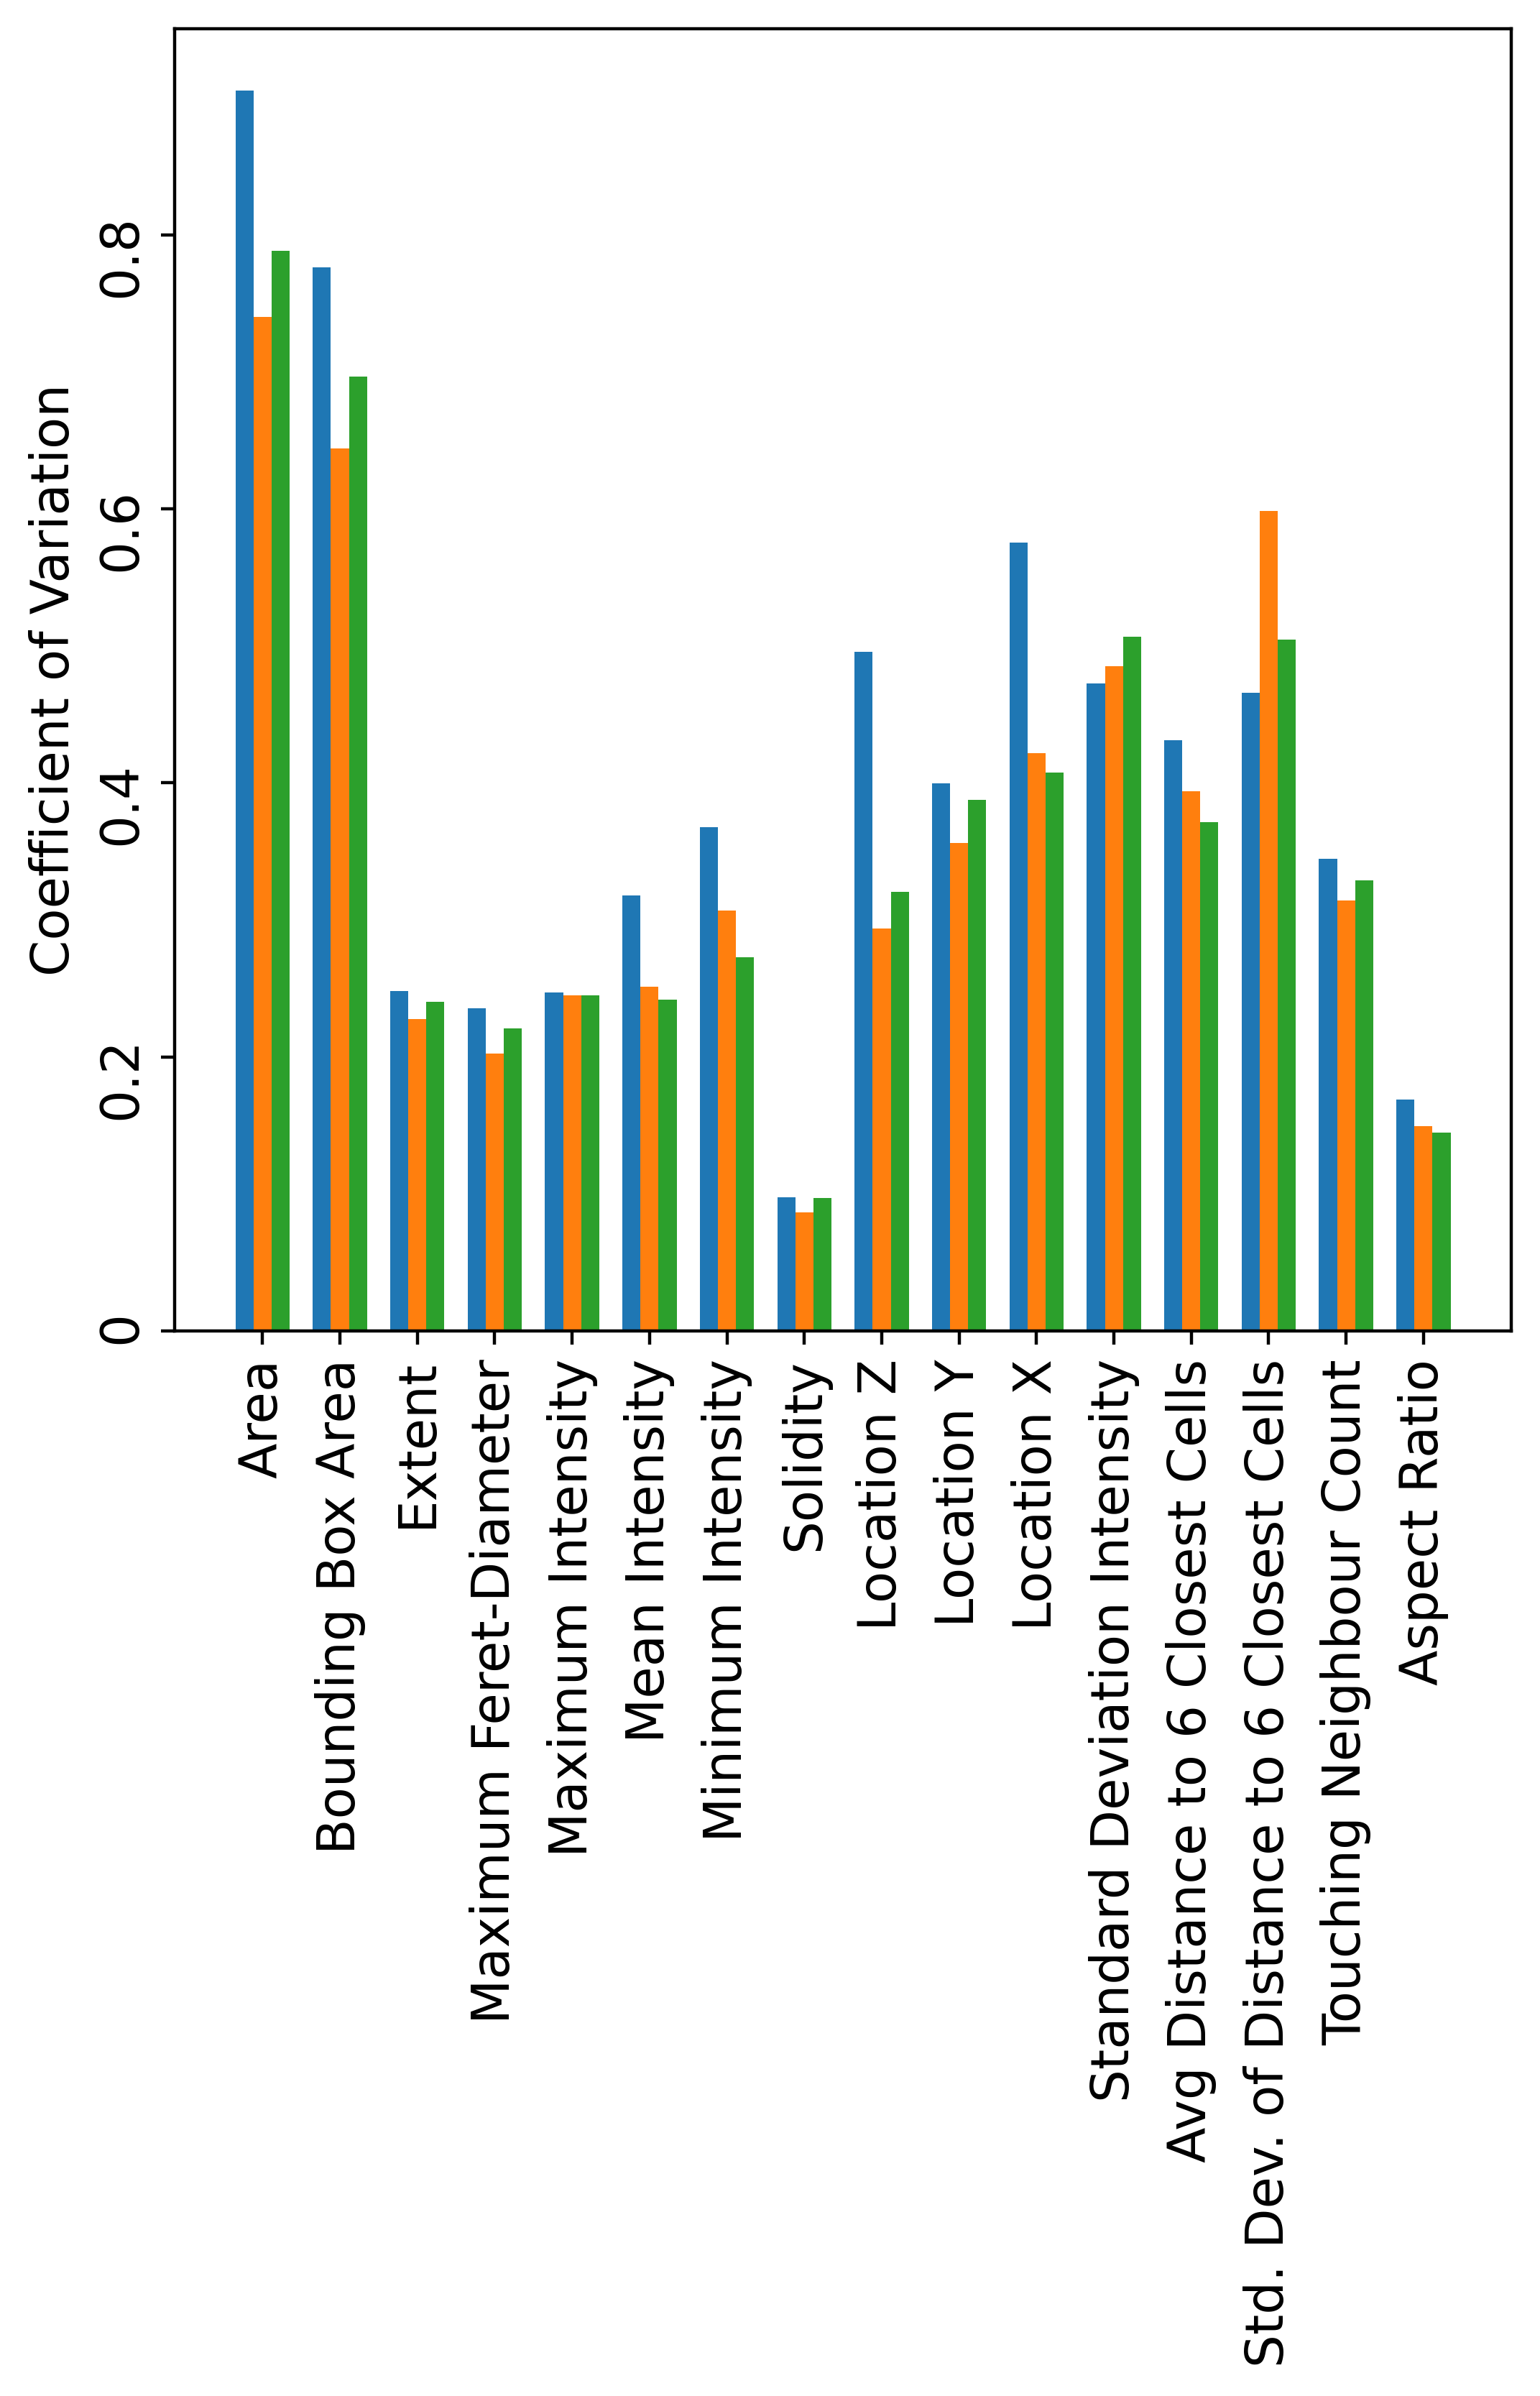

In [31]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Area', 'Bounding Box Area', 'Extent', 'Maximum Feret-Diameter', 'Maximum Intensity',
       'Mean Intensity', 'Minimum Intensity', 'Solidity', 'Location Z',
       'Location Y', 'Location X', 'Standard Deviation Intensity',
       'Avg Distance to 6 Closest Cells',
       'Std. Dev. of Distance to 6 Closest Cells', 'Touching Neighbour Count',
       'Aspect Ratio']


x = np.arange(len(labels))*1.5  # the label locations
width = 0.35  # the width of the bars

lw = 3
big_fs = 13
small_fs = 13

fig, ax1 = plt.subplots(1,1,figsize=(6,6))

# plotting silhouette scores
rects1 = ax1.bar(x - width, coefficients_var_lund, width, label='Lund')
rects2 = ax1.bar(x , coefficients_var_wolg, width, label='Wolgast')
rects3 = ax1.bar(x + width, coefficients_var_fnst, width, label='Finsterwalde')

ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90,fontsize = big_fs)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1],rotation=90,fontsize = big_fs)
ax1.set_ylabel('Coefficient of Variation',fontsize = big_fs)
plt.show()

In [19]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])